### Задача 1
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):  
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],  
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].  
Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная).  
Произвести расчет как с использованием intercept, так и без.

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

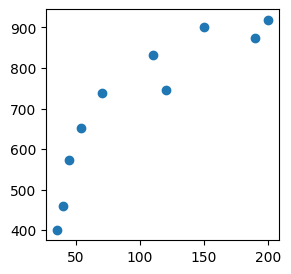

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])  
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

plt.figure(figsize = [3,3])
plt.scatter(zp,ks);

Для прямого расчета будем использовать следующие формулы:  
коэффициент лин. регрессии (без интерсепта):
$$ k = \frac{n*\sum_{i=1}^{n}\chi_i y_i - (\sum_{i=1}^{n}\chi_i)(\sum_{i=1}^{n}y_i)}{n*\sum_{i=1}^{n}\chi_i^2 -(\sum_{i=1}^{n}\chi_i)^2 }$$

In [3]:
n = len(ks)
k = (n*np.sum(zp*ks)-np.sum(zp)*np.sum(ks))/(n*np.sum(zp**2)-(np.sum(zp))**2)
k

2.6205388824027653

Формула коэффициента лин.регрессии с интерсептом:
$$ k = \frac{\bar{xy}-\bar{x}\bar{y}}{\bar{x^2}-\bar{х}^2}$$

для самого интерсепта:  
$$ a = \bar{y} - b \bar{x} \text{ , где } \bar{y}= \frac{\sum_{i=1}^{n}y_i}{n} ,\bar{x} = \frac{\sum_{i=1}^{n}x_i}{n} $$

In [4]:
b1= (np.mean(zp*ks) - np.mean(zp)*np.mean(ks) )/ (np.mean(zp**2) - np.mean(zp)**2)
b1

2.620538882402765

In [5]:
b0 = np.mean(ks) - b1*np.mean(zp)
b0

444.1773573243596

Посмотрим на графике наши линии регрессии.

функция прямой:
444.18+x*2.62
функция прямой:
0.00+x*2.62


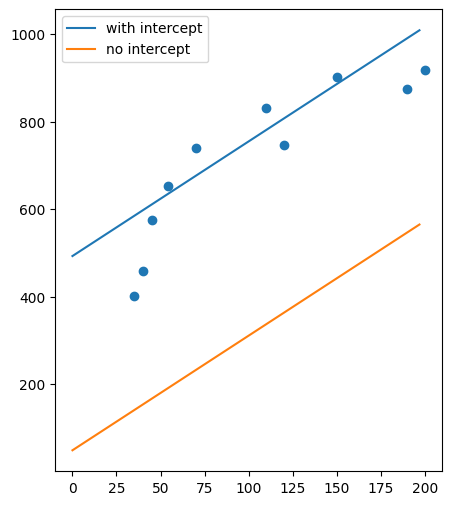

In [6]:
#простая функция прямой для графиков
def Linear(iks:list, b1 :float, intercept:float = 0 )->list:
    print("функция прямой:")
    print(f"{intercept:.2f}+x*{b1:.2f}")
    return intercept+iks*b1

#напишу служебную функцию, чтобы задавать диапазон немного больший диапазона выборки, 
#и подставлять потом как параметр по горизонтальной оси
def manual_range(your_l:list)->np.arange:
    margin = (np.max(your_l) - np.min(your_l))/10
    return np.arange(np.min(your_l)-margin, np.max(your_l)+margin, step=margin//10)

plt.figure(figsize = [5,6])
plt.scatter(zp,ks)
plt.plot(Linear(manual_range(zp), k, b0),label = "with intercept")
plt.plot(Linear(manual_range(zp), k), label = "no intercept")
plt.legend(loc='best');

### Задача 2

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

Запишем функцию потерь(minimal squarage error):
$$mse = \frac{\sum{(y-\^{y})^2}}{n}$$

функция, где $\^{y} = k*x $

In [7]:

def MSE_no_intercept(param:list, target:list, k:float):
    return np.sum(target - k*param)**2 /len(param)


In [8]:
#формула градиента будет производной MSE, т.е. (2*/n) * sum((y_pred-y)*x)
coef = 0.1
n = len(zp)
mse_deriv = (2/n) * np.sum((coef*zp - ks)*zp)


mse_deriv

-159528.08000000002

In [9]:


alpha = 1e-9 
coef = 3
for i in range(1000000):
    stop_check = coef
    coef -= alpha * (2/n) * np.sum((coef*zp - ks)*zp)
    if i % 100000 == 0:
        print(f'step {i} : b1 = {coef} , mse = {MSE_no_intercept(zp,ks,coef)}')
    # print(f'step {i} : b1 = {b1} , mse = {MSE_no_intercept(zp,ks,b1)}');
    if coef-stop_check < alpha : break
coef


step 0 : b1 = 3.0000796238 , mse = 1645859.3894060324
step 100000 : b1 = 5.706072627048399 , mse = 172408.02291041432
step 200000 : b1 = 5.878136586237899 , mse = 129634.05098706791
step 300000 : b1 = 5.889077488899631 , mse = 127120.08368106392
step 400000 : b1 = 5.889773179918399 , mse = 126961.06229004641


5.8897841285684445

In [10]:
# сравним с коэффициэнтом из первой задачи по минимальным потерям:

MSE_no_intercept(zp,ks, b1)



1972935.247596519

Получается, что коэффициент **5.88978** , полученный по градиентному спуску,  более точный, так как он  с меньшей средней квадратичной ошибкой(MSE)

функция прямой:
0.00+x*5.89


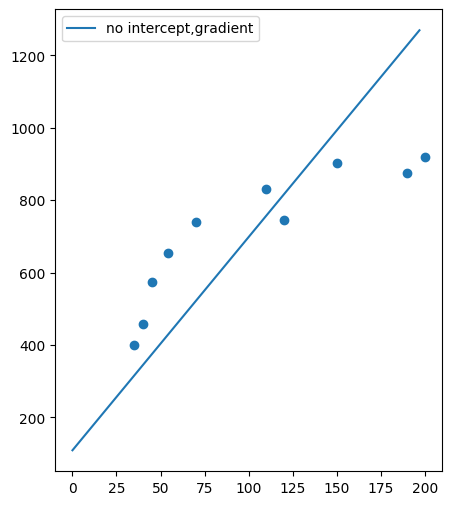

In [11]:
plt.figure(figsize = [5,6])
plt.scatter(zp,ks)
plt.plot(Linear(manual_range(zp), coef), label = "no intercept,gradient")
plt.legend(loc='best');

### Задача 3* 
Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации). 

функция расчета потерь немного поменяется, так как вместо оценочного $y$ подставляем регрессию с интерсептом:

In [12]:
def MSE_intercept(x:list, y:list, k:float, a:float):
    return np.sum(x - k*y - a)**2 /len(x)

Попробуем записать формулы градиента, теперь они для каждого коэффициента будут отдельными.  

In [13]:
#для k1 формула прежняя, только добавилась  k0 как константа :
k0 = 1
k1 = 0.1
n = len(zp)
k_grad =  (2/n) * np.sum((k1*zp +k0- ks)*zp)

#для k0 тоже берем производную от функции потерь, но теперь k1 идет как константа, а производная берется по k0 :

i_grad =  (2/n) * np.sum((k1*zp +k0 - ks))

Посмотрим, на какую величину потерь ориентироваться по найденным ранее регрессиям(задача 1)

In [14]:
MSE_intercept(zp,ks,2.6 , 444.18)

47896197.904

Теперь запустим цикл с точностью поиска alpha, также понадобится запоминание предыдущей итерации, чтобы расчитывать коэффициенты независимо

In [17]:
alpha = 1e-5 
#если брать точность ниже, получим stack overflow ошибку 
k0 = 10
k1 = 0.2
for i in range(2500000):
    k1_i = k1
    k0_i = k0
    k_grad =  (2/n) * np.sum((k1*zp +k0- ks)*zp)
    i_grad =  (2/n) * np.sum((k1*zp +k0 - ks))
    k1 -= alpha * k_grad
    k0 -=alpha * i_grad
    if i % 100000 == 0:
        print(f'step {i} : k1 = {k1} ,k0 = {k0} mse = {MSE_intercept(zp,ks,k1,k0)}')
    # if (abs(k1_i - k1) < alpha) and (abs(k0_i - k0) < alpha) : break


print(f"coefficients: k0={k0},k1={k1} , \n \
    gradients: {i_grad} and {k_grad} \n \
    last iteration diff: {abs(k0_i - k0)}, {abs(k1_i - k1)}")

step 0 : k1 = 1.7474476 ,k0 = 10.0135924 mse = 13204920.431233322
step 100000 : k1 = 4.544553451775896 ,k0 = 182.77803693104423 mse = 109399302.14669676
step 200000 : k1 = 3.7790206199662566 ,k0 = 286.7844021422018 mse = 82260615.12861994
step 300000 : k1 = 3.318080344734529 ,k0 = 349.40839501910534 mse = 67782832.30688015
step 400000 : k1 = 3.040540403268531 ,k0 = 387.1153610868569 mse = 59740891.65601222
step 500000 : k1 = 2.8734289069468137 ,k0 = 409.81936357403106 mse = 55143557.64560769
step 600000 : k1 = 2.7728082465280814 ,k0 = 423.48982775328767 mse = 52464195.77436112
step 700000 : k1 = 2.712222843812156 ,k0 = 431.7210456181597 mse = 50883090.01452039
step 800000 : k1 = 2.6757433473849996 ,k0 = 436.67720121393353 mse = 49942747.38943037
step 900000 : k1 = 2.653778425144331 ,k0 = 439.6613863846693 mse = 49380781.32043991
step 1000000 : k1 = 2.6405529736908817 ,k0 = 441.45821478548163 mse = 49043945.65440633
step 1100000 : k1 = 2.632589705520382 ,k0 = 442.54011557823736 mse = 48

Как видим, градиентный спуск  с расчетом интерсепта приводит к значениям, полученным по формулам, как мы делали в задаче 1. Но длительность расчета растет в разы. Нужно либо оптимизировать цикл, либо довольствоваться моделью без интерсепта.

функция прямой:
444.18+x*2.62
функция прямой:
0.00+x*5.89


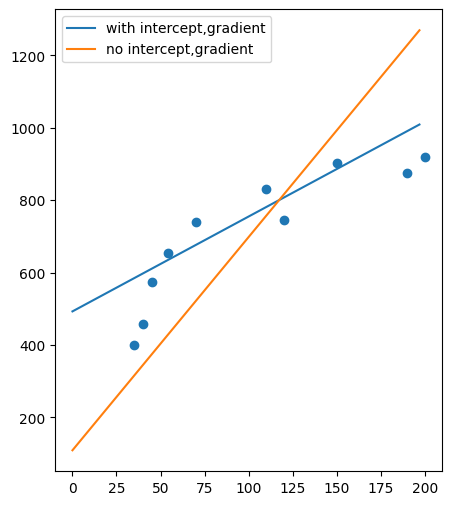

In [ ]:
plt.figure(figsize = [5,6])
plt.scatter(zp,ks)
plt.plot(Linear(manual_range(zp), k1, k0), label = "with intercept,gradient")
plt.plot(Linear(manual_range(zp), coef), label = "no intercept,gradient")
plt.legend(loc='best');